In [7]:

import sys
sys.path.append("../")  

import numpy as np 
import math, torch, time
import torch.nn.functional as F
from torch.optim.lr_scheduler import MultiStepLR, StepLR, MultiplicativeLR
import torch.nn as nn
import matplotlib.pyplot as plt
import sys
import mpl_toolkits.mplot3d as p3d
from scipy.linalg import lstsq
import utility, problem, net
import random

def set_seed(seed=42):
    random.seed(seed)             # Python 内置随机数种子
    np.random.seed(seed)          # NumPy 随机数种子
    torch.manual_seed(seed)       # PyTorch CPU 随机数种子
    torch.cuda.manual_seed(seed)  # PyTorch GPU 随机数种子
    torch.cuda.manual_seed_all(seed)  # 多 GPU 训练时设定所有 GPU 相同种子
    torch.backends.cudnn.deterministic = True  # 保证 CUDA 计算的确定性
    torch.backends.cudnn.benchmark = False  # 关闭自动优化（可能影响速度）

# 设置随机种子
set_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [8]:
torch.set_default_dtype(torch.float64)
plt.rcParams.update({'font.size': 20})
def u_exact(x):
    return torch.sin(3*torch.pi*x+3*torch.pi/20)*torch.cos(2*torch.pi*x+torch.pi/10)+2

def f(x):
    return -13*torch.pi**2*torch.sin(3*torch.pi*x+3*torch.pi/20)*torch.cos(2*torch.pi*x+torch.pi/10) - 12*torch.pi**2*torch.cos(3*torch.pi*x+3*torch.pi/20)*torch.sin(2*torch.pi*x+torch.pi/10) - 10*u_exact(x)

##### PD-OFM

Loss at Step 50 is 8629.476043164905 with pde loss 8419.533345391348 , orthogonal loss 209.94269777355694 and rank of matrix 7.
Loss at Step 100 is 8185.522625835265 with pde loss 8069.634827861889 , orthogonal loss 115.88779797337617 and rank of matrix 10.
the maximum pointwise error in problem helmholtz1d:  2.242702978743367
the l2 relative error in problem helmholtz1d:  0.7875850908521296


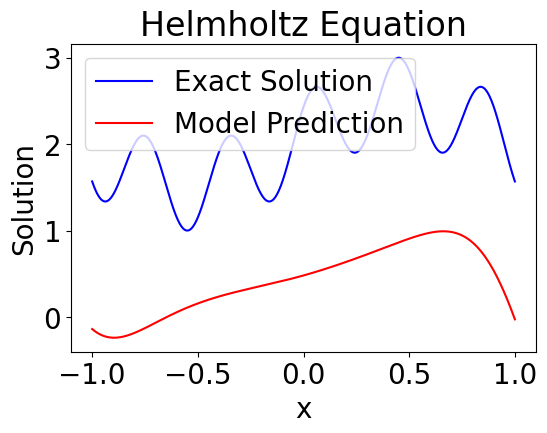

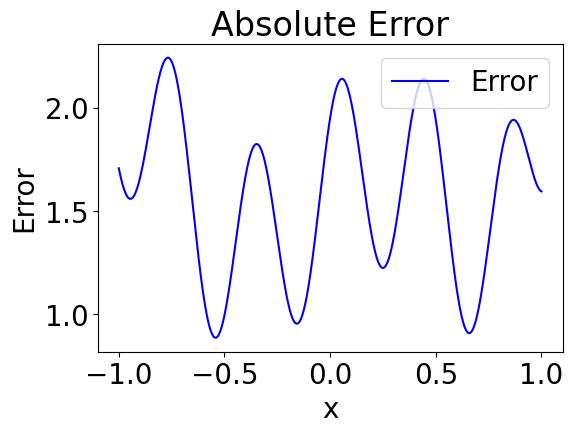

Loss at Step 150 is 6134.440134954052 with pde loss 5599.835909494973 , orthogonal loss 534.6042254590794 and rank of matrix 14.
Loss at Step 200 is 2884.049961046998 with pde loss 1559.5106475620787 , orthogonal loss 1324.5393134849194 and rank of matrix 19.
the maximum pointwise error in problem helmholtz1d:  2.7213038635028277
the l2 relative error in problem helmholtz1d:  0.5080287022053226


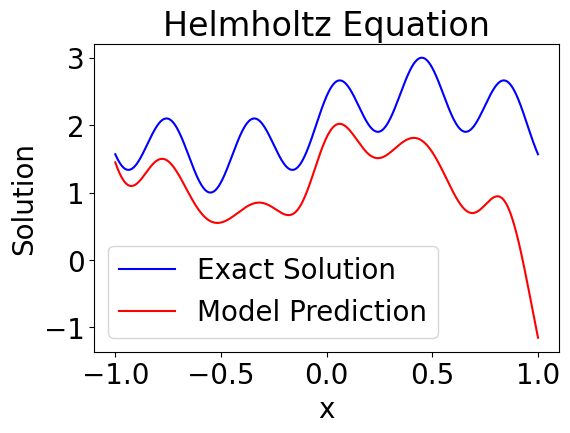

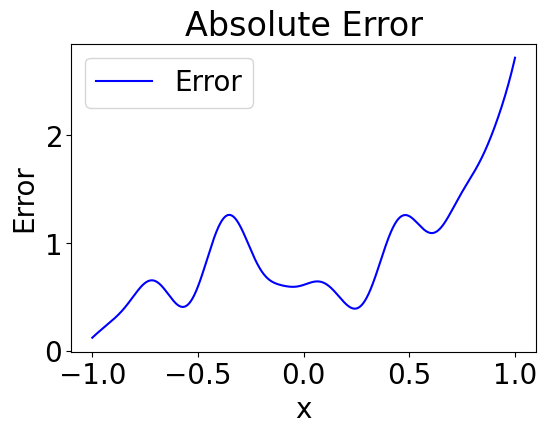

Loss at Step 250 is 784.2262817339234 with pde loss 105.18552770005633 , orthogonal loss 679.0407540338671 and rank of matrix 21.
Loss at Step 300 is 439.4127284292635 with pde loss 45.61528691006886 , orthogonal loss 393.79744151919465 and rank of matrix 21.
the maximum pointwise error in problem helmholtz1d:  3.643127302983578
the l2 relative error in problem helmholtz1d:  0.5355248225895906


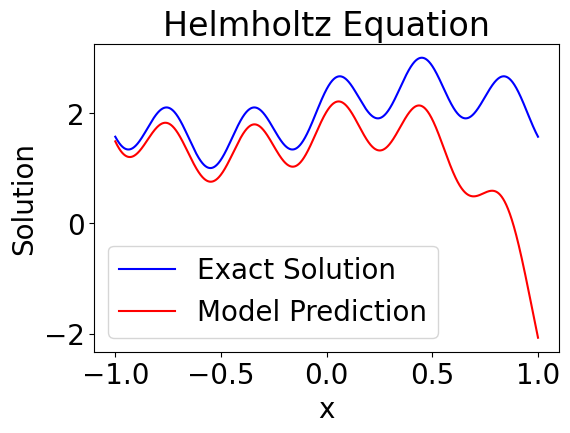

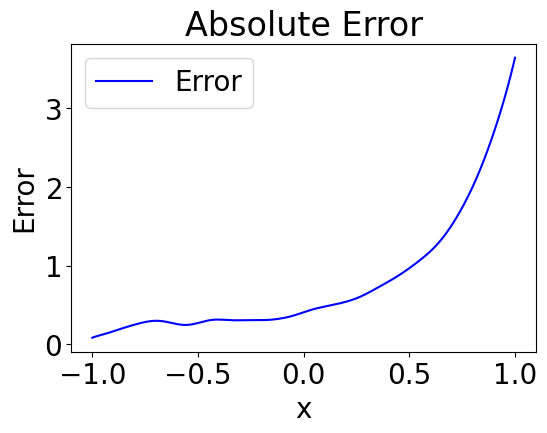

Loss at Step 350 is 306.35783295746637 with pde loss 30.438260040303895 , orthogonal loss 275.9195729171625 and rank of matrix 20.
Loss at Step 400 is 248.32212811984007 with pde loss 40.02868193863018 , orthogonal loss 208.2934461812099 and rank of matrix 20.
the maximum pointwise error in problem helmholtz1d:  3.5242383504073778
the l2 relative error in problem helmholtz1d:  0.5536757190819389


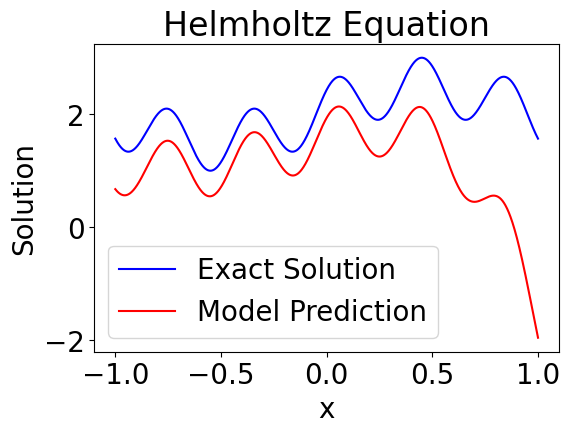

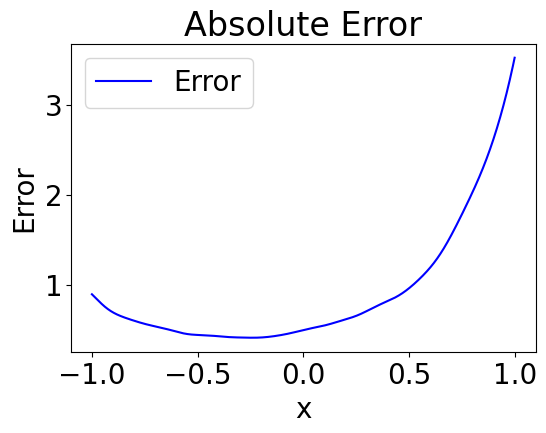

Loss at Step 450 is 198.2829617184117 with pde loss 26.84343691526082 , orthogonal loss 171.4395248031509 and rank of matrix 20.
Loss at Step 500 is 173.75898933217076 with pde loss 26.079590943505778 , orthogonal loss 147.679398388665 and rank of matrix 20.
the maximum pointwise error in problem helmholtz1d:  3.6283529908079397
the l2 relative error in problem helmholtz1d:  0.5843679418613169


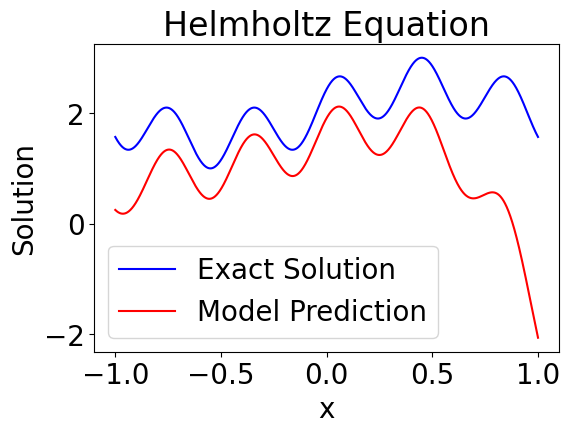

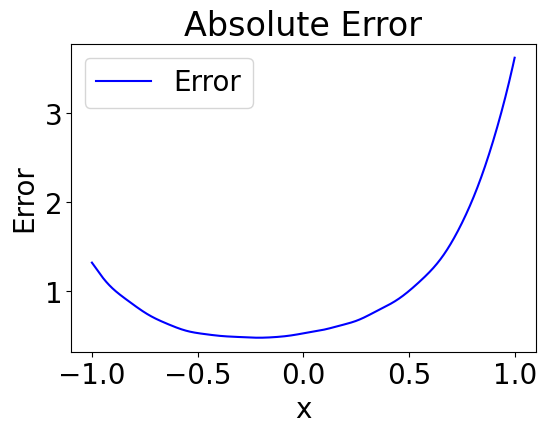

Loss at Step 550 is 155.92477915250927 with pde loss 25.438281371460615 , orthogonal loss 130.48649778104866 and rank of matrix 20.
Loss at Step 600 is 142.32341877263087 with pde loss 23.9064155277558 , orthogonal loss 118.41700324487506 and rank of matrix 20.
the maximum pointwise error in problem helmholtz1d:  3.5504103854775426
the l2 relative error in problem helmholtz1d:  0.590695120959463


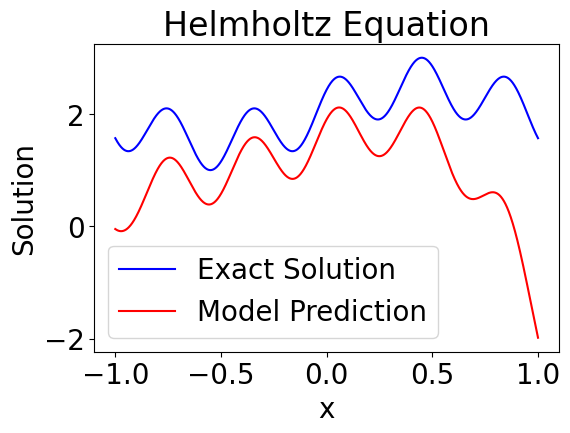

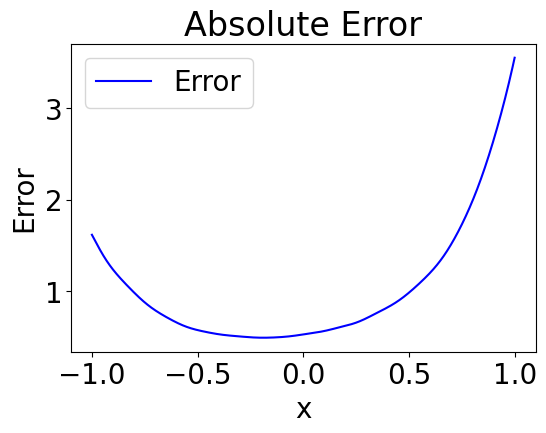

Loss at Step 650 is 130.7340372358385 with pde loss 22.16453082614063 , orthogonal loss 108.56950640969788 and rank of matrix 20.
Loss at Step 700 is 124.40169658411992 with pde loss 24.32648899224227 , orthogonal loss 100.07520759187764 and rank of matrix 20.
the maximum pointwise error in problem helmholtz1d:  3.3928882238139035
the l2 relative error in problem helmholtz1d:  0.5826872644167072


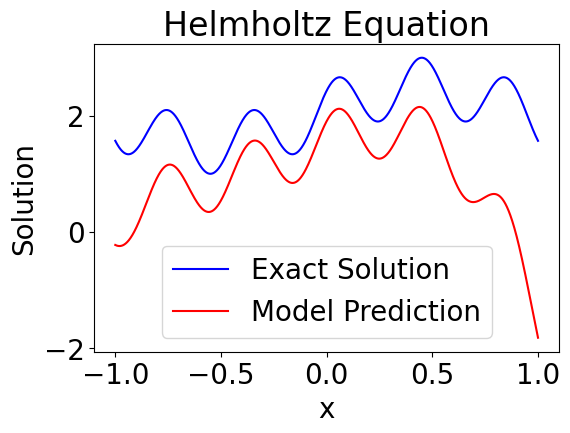

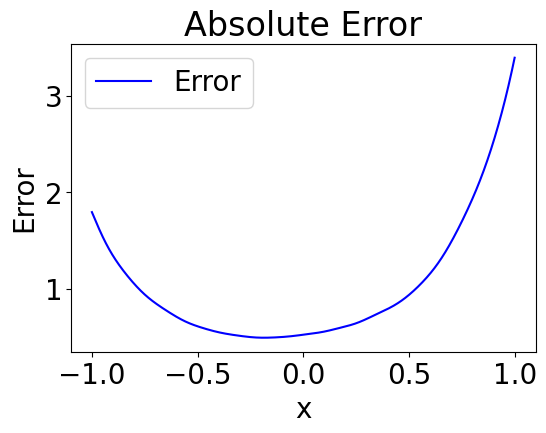

Loss at Step 750 is 114.13388181858994 with pde loss 20.476610237509888 , orthogonal loss 93.65727158108005 and rank of matrix 20.
Loss at Step 800 is 107.59348127158887 with pde loss 19.728135038372137 , orthogonal loss 87.86534623321673 and rank of matrix 20.
the maximum pointwise error in problem helmholtz1d:  3.44789407400454
the l2 relative error in problem helmholtz1d:  0.5928403062289093


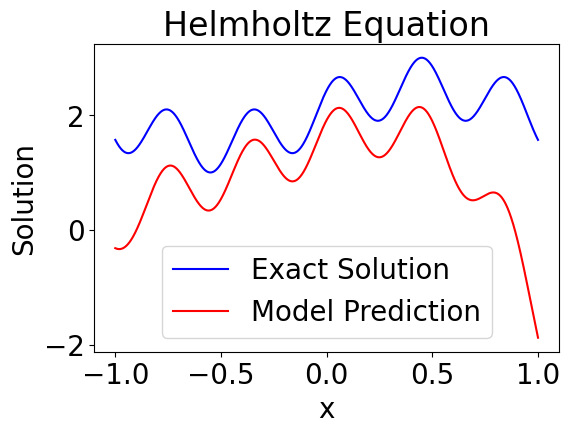

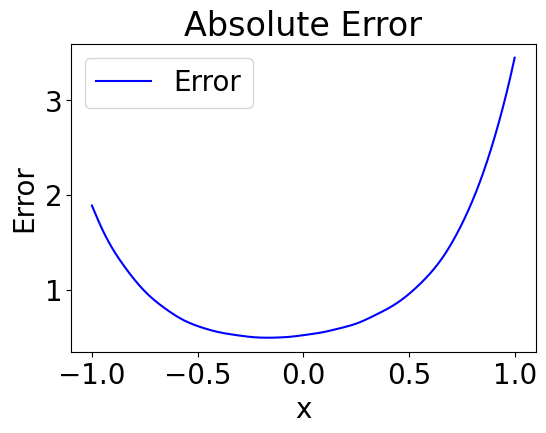

Loss at Step 850 is 101.66502547597842 with pde loss 19.13738563184886 , orthogonal loss 82.52763984412957 and rank of matrix 20.
Loss at Step 900 is 99.23443010698448 with pde loss 21.63132722132059 , orthogonal loss 77.60310288566389 and rank of matrix 20.
the maximum pointwise error in problem helmholtz1d:  3.3286580538208543
the l2 relative error in problem helmholtz1d:  0.584663380278736


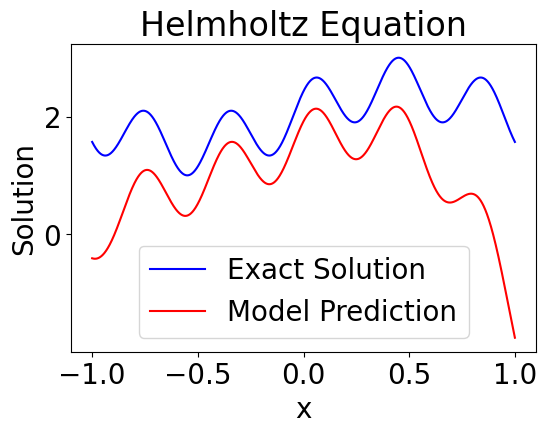

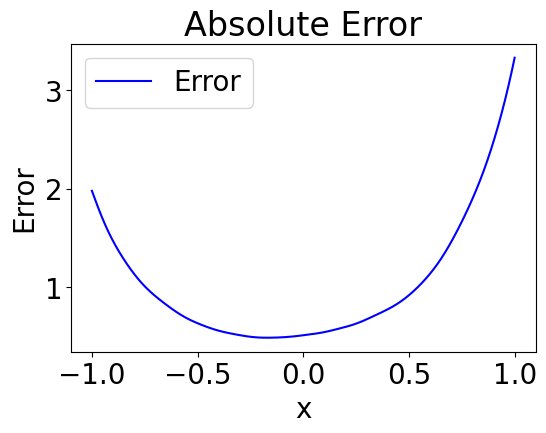

Loss at Step 950 is 92.11901077813957 with pde loss 18.294561388732845 , orthogonal loss 73.82444938940672 and rank of matrix 20.
Loss at Step 1000 is 87.69150732932638 with pde loss 17.39638681701689 , orthogonal loss 70.2951205123095 and rank of matrix 20.
the maximum pointwise error in problem helmholtz1d:  3.3702696826687557
the l2 relative error in problem helmholtz1d:  0.5903259557902124


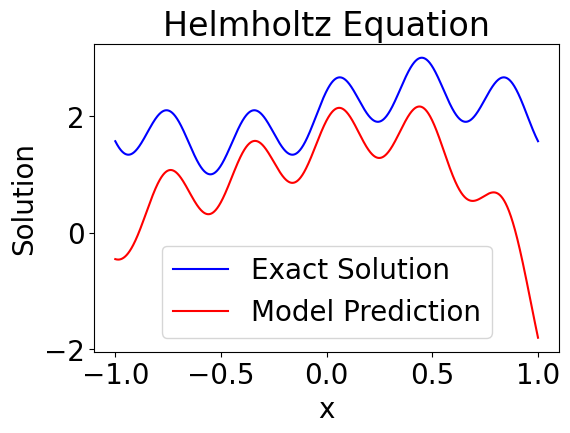

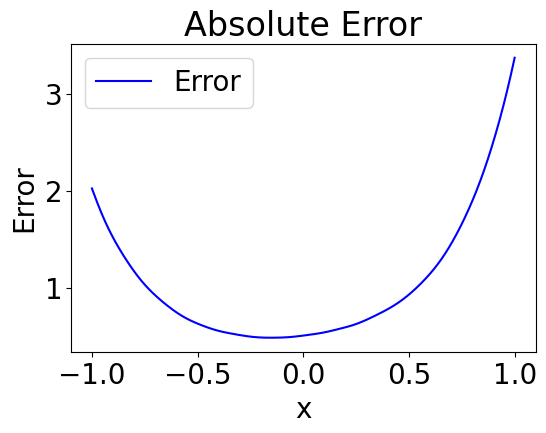

Final Loss at Step 999 is 87.69150732932638 with pde loss 17.39638681701689 , orthogonal loss 70.2951205123095.
after least squares
the error of least square in problem helmholtz1d:  6.795041929884163e-10
the effective rank of basis in problem helmholtz1d is 20 with threshold 0.001
the maximum pointwise error in problem helmholtz1d:  2.9172220195050613e-12
the l2 relative error in problem helmholtz1d:  3.964924210431915e-13


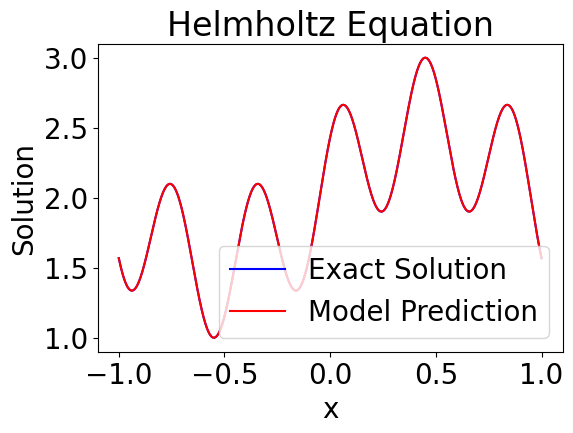

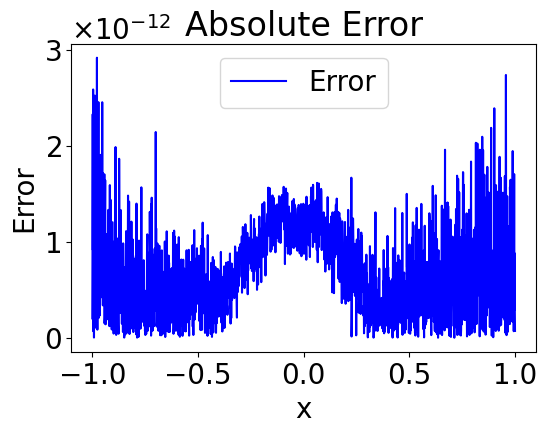

In [9]:
Pro = problem.Helmholtz(f, u_exact, u_exact, -1, 1, wavenumber=10)

params = {"d": 1, "bodyBatch": 1000, "bdryBatch":2, "lr": 0.001, "width": 100, "depth":2, "trainStep": 1000, "writeStep": 50, "plotStep": 100, "decay": 0.0001, "epsilon": 1e-3, "orthogonalpenalty": 1}


startTime = time.time()
model = net.PD_OFM(params, initialization="xavier").to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=params["lr"], weight_decay=params["decay"])

startTime = time.time()
rank_orthogonal, sigma_orthogonal = utility.trainnew(model,Pro,device,params,optimizer)  #trainnew model

### PD-FM

Loss at Step 50 is 8173.14952769069 with pde loss 8173.14952769069 , orthogonal loss 4652.089820946362 and rank of matrix 9.
Loss at Step 100 is 6817.938375536607 with pde loss 6817.938375536607 , orthogonal loss 17084.522198173083 and rank of matrix 13.
the maximum pointwise error in problem helmholtz1d:  7.285883959441078
the l2 relative error in problem helmholtz1d:  1.360357039521503


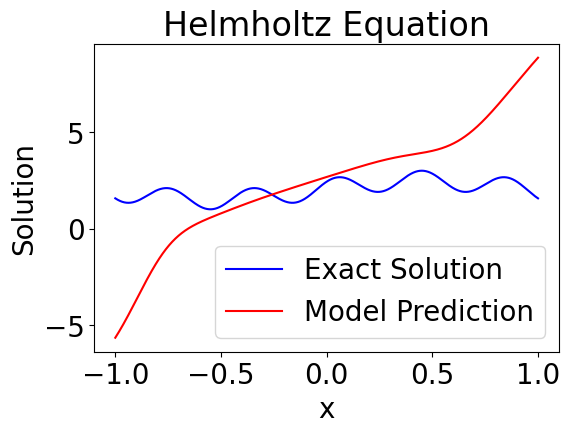

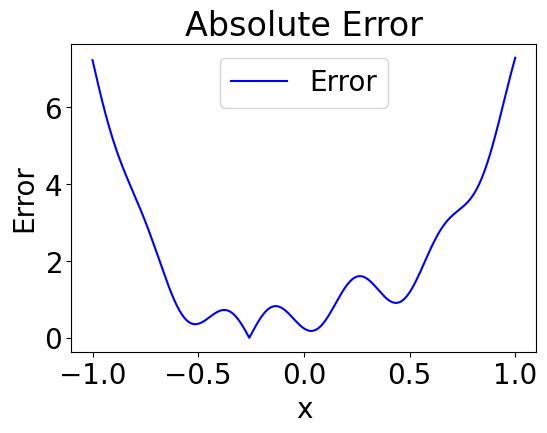

Loss at Step 150 is 967.4563100183664 with pde loss 967.4563100183664 , orthogonal loss 23658.135871709852 and rank of matrix 22.
Loss at Step 200 is 109.73438544478756 with pde loss 109.73438544478756 , orthogonal loss 28700.098717974026 and rank of matrix 25.
the maximum pointwise error in problem helmholtz1d:  4.1720027610233945
the l2 relative error in problem helmholtz1d:  0.781785709503131


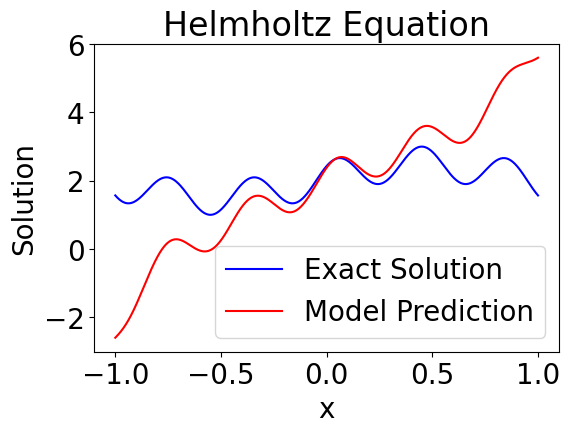

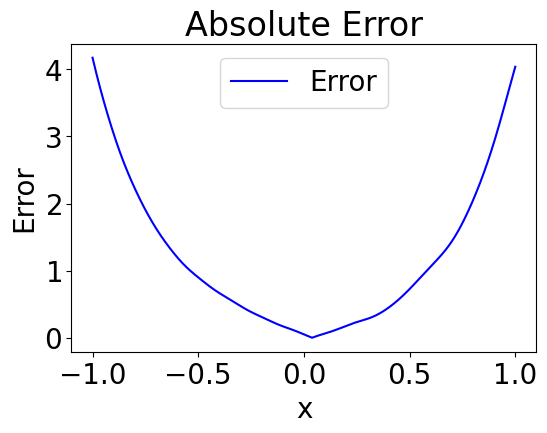

Loss at Step 250 is 14.157812434703317 with pde loss 14.157812434703317 , orthogonal loss 30298.777228066472 and rank of matrix 27.
Final Loss at Step 287 is 8.827181168526256 with pde loss 8.827181168526256 , orthogonal loss 30603.17064450336.
after least squares
the error of least square in problem helmholtz1d:  8.218140031043714e-09
the effective rank of basis in problem helmholtz1d is 28 with threshold 0.001
the maximum pointwise error in problem helmholtz1d:  5.4726001508242916e-11
the l2 relative error in problem helmholtz1d:  1.1646667140279298e-11


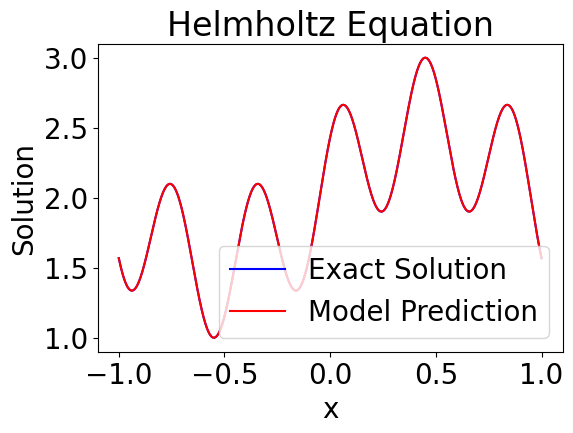

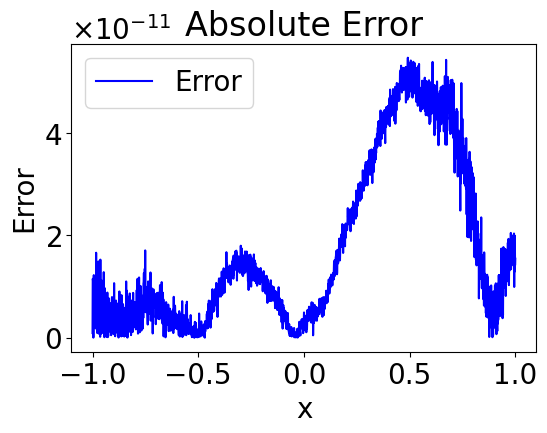

In [10]:
Pro = problem.Helmholtz(f, u_exact, u_exact, -1, 1, wavenumber=10)

params = {"d": 1, "bodyBatch": 1000, "bdryBatch":2, "lr": 0.001, "width": 100, "depth":2, "trainStep": 1000, "writeStep": 50, "plotStep": 100, "decay": 0.0001, "epsilon": 1e-3, "orthogonalpenalty": 0}


startTime = time.time()
model = net.PD_OFM(params, initialization="xavier").to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=params["lr"], weight_decay=params["decay"])

startTime = time.time()
rank_orthogonal, sigma_orthogonal = utility.trainnew(model,Pro,device,params,optimizer)  #trainnew model

#### Transnet

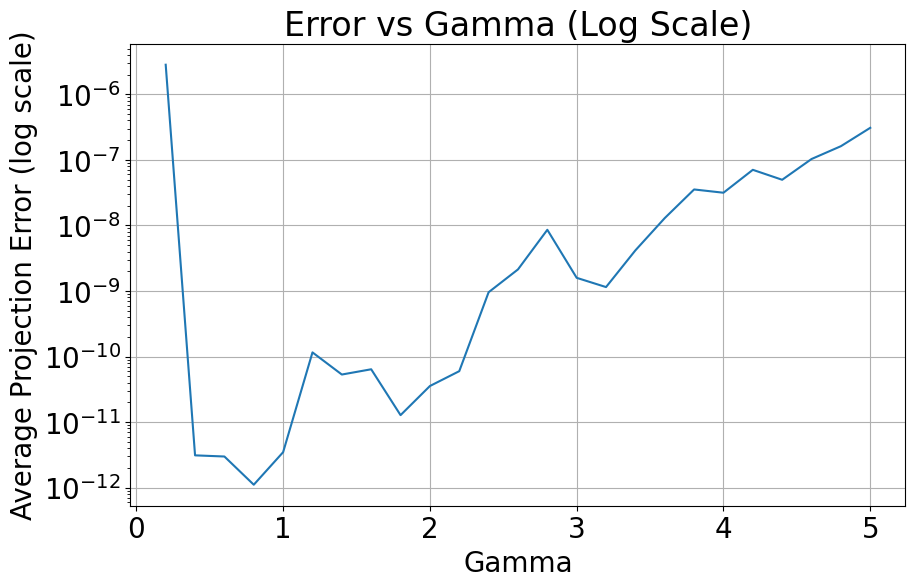

the optimal shape paramter:  0.800000011920929
the error of least square in problem helmholtz1d:  1.9824002610881624
the effective rank of basis in problem helmholtz1d is 4 with threshold 0.001
the maximum pointwise error in problem helmholtz1d:  0.0050333914492837195
the l2 relative error in problem helmholtz1d:  0.0008081760128181353


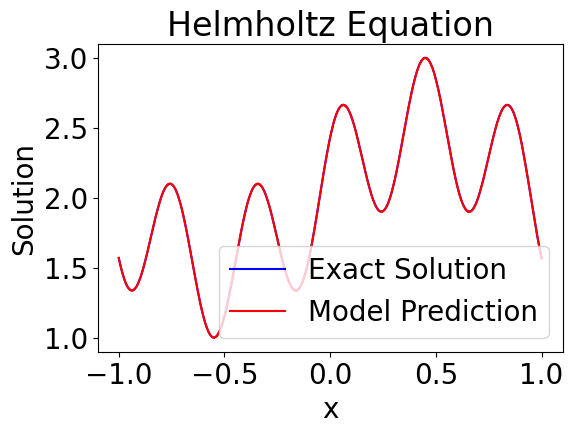

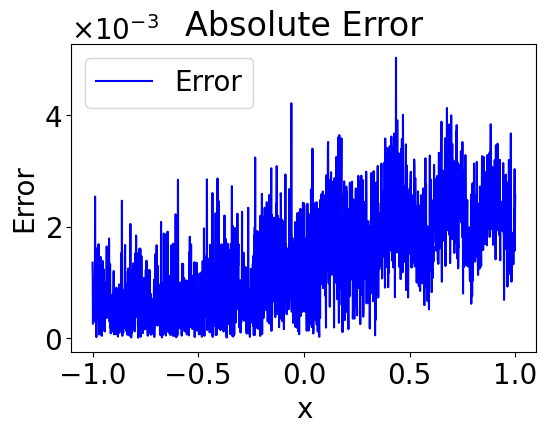

In [11]:
device="cpu"
set_seed(42)

### Initializing Transnet and Problem
params = dict()
params = {"radius": 1, "d": 1, "bodyBatch": 1024, "bdryBatch":2, "width": 100, "lambda": 10}
model = net.TransNet(params["d"], params["width"], params["radius"]).to(device)
print("the optimal shape paramter: ", model.shape_parameter)
Pro = problem.Helmholtz(f, u_exact, u_exact, -1, 1, wavenumber=10, device=device)
Pro.generate_points(params["bodyBatch"], params["bdryBatch"]) 
int_data = Pro.data()["interior_points"]
bdry_data = Pro.data()["boundary_points"]
int_data.requires_grad = True
bdry_data.requires_grad = True

### Solving Least Sqaure Problem
(A, rhs) = Pro.leastsquareproblem(model, int_data, bdry_data)
w, residuals, rank, s = lstsq(A, rhs)
U, s, Vh = torch.linalg.svd(model(int_data)[0].T@model(int_data)[0])
threshold = 1e-3
effective_rank = (s > threshold).sum()
error = A @ w - rhs
print("the error of least square in problem " + str(Pro.name)+": ", np.mean(np.abs(error)))
print("the effective rank of basis in problem %s is %s with threshold %s" % (str(Pro.name), effective_rank.detach().cpu().numpy(), threshold))

### Visualization
perdict = lambda x: torch.matmul(model(x)[0], torch.tensor(w).to(device))
error_l2, error_l2_rel = Pro.plot(perdict)

### Random Feature Model

the error of least square in problem helmholtz1d:  1.3071471941824237e-05
the effective rank of basis in problem helmholtz1d is 10 with threshold 0.001
the maximum pointwise error in problem helmholtz1d:  5.933917224254515e-07
the l2 relative error in problem helmholtz1d:  1.2056132144983155e-07


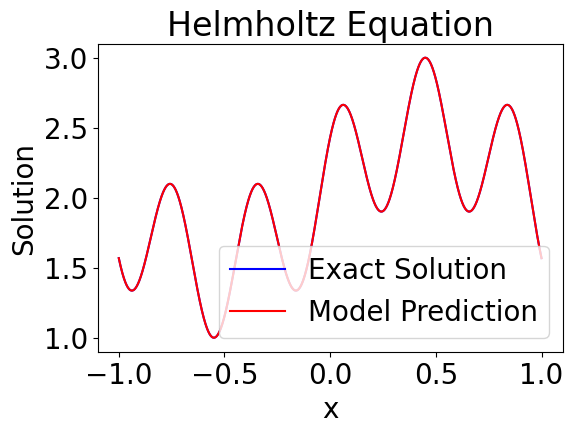

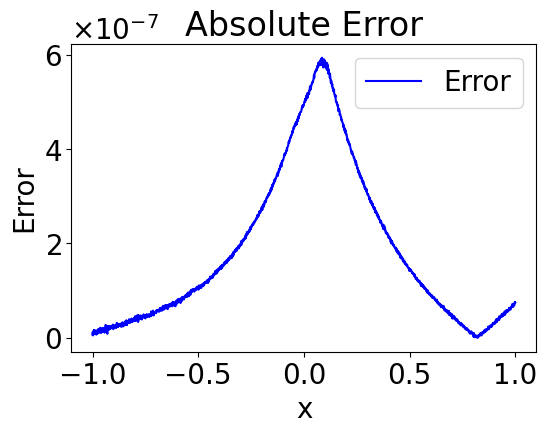

In [12]:
device="cpu"
set_seed(42)

### Initializing RFM and Problem
params = dict()
params = {"d": 1, "bodyBatch": 1024, "bdryBatch":2, "number_basis": 100}
centers = torch.tensor([[0.5],[-0.5]], dtype=torch.float64).to(device)
radius = torch.tensor([[0.5],[0.5]], dtype=torch.float64).to(device)
model = net.RFM(params, centers, radius, typeofPoU="b", device=device).to(device)
Pro = problem.Helmholtz(f, u_exact, u_exact, -1, 1, wavenumber=10, device=device)
Pro.generate_points(params["bodyBatch"], params["bdryBatch"]) 
int_data = Pro.data()["interior_points"]
bdry_data = Pro.data()["boundary_points"]
int_data.requires_grad = True
bdry_data.requires_grad = True

### Solving Least Sqaure Problem
(A, rhs) = Pro.leastsquareproblem(model, int_data, bdry_data)
w, residuals, rank, s = lstsq(A, rhs)
U, s, Vh = torch.linalg.svd(model(int_data)[0].T@model(int_data)[0])
threshold = 1e-3
effective_rank = (s > threshold).sum()
error = A @ w - rhs
print("the error of least square in problem " + str(Pro.name)+": ", np.mean(np.abs(error)))
print("the effective rank of basis in problem %s is %s with threshold %s" % (str(Pro.name), effective_rank.detach().cpu().numpy(), threshold))

### Visualization
perdict = lambda x: torch.matmul(model(x)[0], torch.tensor(w).to(device))
error_l2, error_l2_rel = Pro.plot(perdict)
